# These are the Cartography visuals.

# To Do:
- make HA only and HA + NA sections, get snakemake notebook_docs folder ready

# Imports Section 

In [123]:
import sys
sys.path.append("../notebooks/scripts/")

In [124]:
import altair as alt
from altair_saver import save
from augur.utils import json_to_tree
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
#from reportlab.graphics import renderPDF
import seaborn as sns
#from svglib.svglib import svg2rlg

from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive
from Helpers import get_y_positions

%matplotlib inline

In [125]:
alt.renderers.set_embed_options(
    padding={"left": 0, "right": 0, "bottom": 1, "top": 1}
)

RendererRegistry.enable('default')

In [126]:
sns.set_style("ticks")
# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 100
# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 8
mpl.rc('text', usetex=False)

In [127]:
try: 
    snakemake.input.node_df
    import selenium
    from selenium.webdriver import Chrome 
    from selenium import webdriver

    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--remote-debugging-port=9222")

    browser = webdriver.Chrome(options=chrome_options)
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


## Pathogen-specific variables

Consider consolidating these into a single configuration file that can be passed to the notebook as a command line argument for more scriptable generation of these figures.

# Flu Specific Variables

In [128]:
try:
    node_df = snakemake.input.node_df

    pca_df = snakemake.input.pca_df
    explained_variance_pca = snakemake.input.explained_variance_pca

    mds_df = snakemake.input.mds_df

    #Scatterplot:
    scatterplot_pca = snakemake.input.scatterplot_pca
    scatterplot_pca_metadata = snakemake.input.scatterplot_pca_metadata

    scatterplot_mds = snakemake.input.scatterplot_mds
    scatterplot_mds_metadata = snakemake.input.scatterplot_mds_metadata

    scatterplot_tsne = snakemake.input.scatterplot_tsne
    scatterplot_tsne_metadata = snakemake.input.scatterplot_tsne_metadata

    scatterplot_umap = snakemake.input.scatterplot_umap
    scatterplot_umap_metadata = snakemake.input.scatterplot_umap_metadata

    #KDE Density:
    KDE_pca = snakemake.input.KDE_pca
    KDE_pca_metadata = snakemake.input.KDE_pca_metadata

    KDE_mds = snakemake.input.KDE_mds
    KDE_mds_metadata = snakemake.input.KDE_mds_metadata

    KDE_tsne = snakemake.input.KDE_tsne
    KDE_tsne_metadata = snakemake.input.KDE_tsne_metadata

    KDE_umap = snakemake.input.KDE_umap
    KDE_umap_metadata = snakemake.input.KDE_umap_metadata
    
    KDE_genetic = snakemake.input.KDE_genetic
    KDE_genetic_metadata = snakemake.input.KDE_genetic_metadata
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


In [129]:
clades_to_plot = ['3c2', '3c2.A', '3c3.A', 'A1','A1b', 'A1b/131K','A1b/135K', 'A1b/135N', 'A1b/137F', 'A1b/186D', 'A1b/197R', 'A1b/94N', 'A2', 'A2/re', 'A3'] 
domain =   ['3c2', '3c2.A', '3c3.A', 'A1','A1b', 'A1b/131K','A1b/135K', 'A1b/135N', 'A1b/137F', 'A1b/186D', 'A1b/197R', 'A1b/94N', 'A2', 'A2/re', 'A3'] 
range_ = ['#6626d4', '#4138c3', '#4e70ff', '#5499ff', '#61b8f0', '#5499ff', '#87dfb3','#a0e994', '#bdee78', '#ddee64', '#f8e957', '#ffdb4e', '#ffc348', '#ff9e40', '#ff6e36']

# Reading in all the data from the scripts

In [130]:
import os

os.getcwd()

'/mnt/c/Work/BedfordProjects/cartography/ha-na-nextstrain'

In [131]:
#node_df = pd.read_csv(node_df, sep="\t")
node_df = pd.read_csv("results/table.tsv", sep="\t")

In [132]:
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [133]:
node_df.head()

,strain,date,pca1,pca2,pca3,pca4,mds1,mds2,mds3,mds4,tsne_x,tsne_y,umap_x,umap_y,clade_membership,pca_label,mds_label,umap_label,t-sne_label,y
0,A/RobatKarim/21210/2016,2016.05,-1.64,4.30,-0.45,-0.17,4.77,-3.62,-8.25,-6.44,1.75,2.93,17.73,7.21,3c,0,-1,2,1,1
1,A/MUWRP-Uganda/579/2016,2016.67,-1.27,5.36,-0.74,-0.47,14.81,-13.63,3.45,11.91,1.92,4.73,-3.07,-4.26,3c3,0,-1,1,1,2
2,A/Arkansas/02/2016,2016.08,-1.96,6.76,-0.74,-0.69,6.16,-4.61,-13.40,-7.86,2.41,3.24,-2.84,-4.52,3c3,0,-1,1,1,3
3,A/Sydney/29/2016,2016.03,-1.96,6.76,-0.74,-0.69,19.95,-2.82,-10.78,-10.28,2.47,3.27,-2.97,-4.65,3c3,0,-1,1,1,4
4,A/Georgia/68828/2018,2018.02,-2.00,6.93,0.46,1.03,10.90,4.95,-16.34,-3.73,-1.67,4.06,-3.04,-3.91,3c3.A,0,-1,1,1,5


In [134]:
# Reannotate clades that we aren't interested in as "other" to simplify color assignment in visualizations.
try:
    node_df["clade_membership_color"] = node_df["clade_membership"].apply(lambda clade: clade if clade in clades_to_plot else "other")
except:
    node_df["clade_membership_color"] = node_df["clade_membership"]
    print("clades_to_plot undefined")

# Running PCA on Scaled and Centered Data
- I treated each nucleotide as a "site", or dimension, and found the probability of having a certain nucleotide given the frequency of that letter at that site.
- I used [this paper][1] as my source 
- The equation is as follows where C is the matrix of dimensions, M is the mean, and p is the frequency of a nucleotide at that given site. 
![](https://journals.plos.org/plosgenetics/article/file?type=thumbnail&id=info:doi/10.1371/journal.pgen.0020190.e003)

In [135]:
#principalDf = pd.read_csv(pca_df, index_col=0)
principalDf_ha = pd.read_csv("results/embed_pca_ha.csv", index_col=0)
principalDf_concatenated = pd.read_csv("results/embed_pca_concatenated.csv", index_col=0)

In [136]:
#explained_variance_df = pd.read_csv(explained_variance_pca)
explained_variance_df_ha = pd.read_csv("results/explained_variance_pca_ha.csv")
explained_variance_df_concatenated = pd.read_csv("results/explained_variance_pca_concatenated.csv")
explained_variance_df

,explained variance,principal components
0,0.2564,1
1,0.2218,2
2,0.0841,3
3,0.0608,4
4,0.0308,5
5,0.0259,6
6,0.0166,7
7,0.0148,8
8,0.0132,9
9,0.0127,10


Text(0.5, 1.0, 'Explained Variance Plot (Flu)')

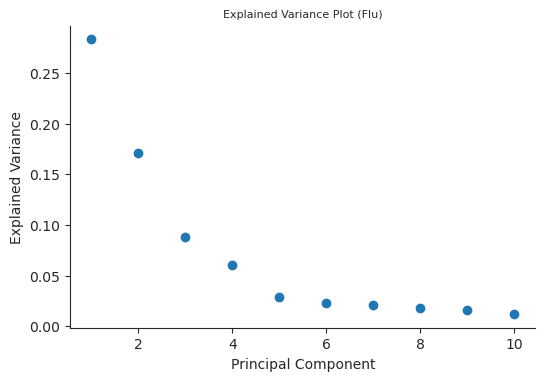

In [137]:
plt.plot(explained_variance_df_ha['principal components'].values.tolist(), explained_variance_df_ha["explained variance"].values.tolist(), 'o')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")

plt.title(f"Explained Variance Plot (Flu)")

#plt.savefig(snakemake.output.Explained_variance_PCA)

In [138]:
merged_pca_df_ha = principalDf_ha.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")
merged_pca_df_concatenated = principalDf_concatenated.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")

In [139]:
explained_variance_PCA_ha = explained_variance_df_ha["explained variance"].values.tolist()
explained_variance_PCA_concatenated = explained_variance_df_concatenated["explained variance"].values.tolist()

In [140]:
list_of_chart_ha = linking_tree_with_plots_brush(merged_pca_df_ha,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[5]*100,2)) + ")"],
                                         "clade_membership:N",['strain', "clade_membership"], domain, range_)

list_of_chart_concatenated = linking_tree_with_plots_brush(merged_pca_df_concatenated,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[5]*100,2)) + ")"],
                                         "clade_membership:N",['strain', "clade_membership"], domain, range_)
PCAFluBrush_ha = list_of_chart_ha[0]|list_of_chart_ha[1]|list_of_chart_ha[2]
PCAFluBrush_concatenated = list_of_chart_concatenated[0]|list_of_chart_concatenated[1]|list_of_chart_concatenated[2]

alt.vconcat(PCAFluBrush_ha,PCAFluBrush_concatenated)
#PCAFluBrush.save("docs/PCA" + virus_name + "Brush.html")

alt.VConcatChart(...)

# Running MDS on the Dataset

In [141]:
#MDS_df = pd.read_csv(mds_df,index_col=0)
MDS_df_ha = pd.read_csv("results/embed_mds_ha.csv",index_col=0)
MDS_df_concatenated = pd.read_csv("results/embed_mds_concatenated.csv",index_col=0)

In [142]:
merged_mds_df_ha = MDS_df_ha.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")
merged_mds_df_concatenated = MDS_df_concatenated.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [143]:
merged_mds_df_ha

,strain,mds1,mds2,mds3,mds4,mds5,mds6,mds7,mds8,mds9,mds10,mds_label,date,y,clade_membership,clade_membership_color
0,A/Alaska/04/2016,0.183399,-10.552153,-0.437960,-4.502908,0.591662,-1.397222,7.713758,2.549828,4.783412,1.514258,2,2016.05,162,3c2.A,3c2.A
1,A/Hawaii/07/2016,-1.213617,-10.616477,-1.240862,-6.683048,1.473696,-0.409853,8.292970,1.336101,6.182433,1.023671,-1,2016.03,159,3c2.A,3c2.A
2,A/Utah/28/2016,-0.347034,-11.616399,-0.230370,-4.807969,0.427047,-1.844953,8.100081,1.964323,6.269579,1.025671,2,2016.23,161,3c2.A,3c2.A
3,A/California/4932/2016,-0.749075,-12.385967,-0.102161,-3.817684,0.637721,-2.237013,7.905257,2.868800,5.011100,1.547974,2,2016.07,160,3c2.A,3c2.A
4,A/Alaska/22/2016,3.948733,-11.335913,1.043948,-7.454649,1.155096,-3.123275,8.374548,-0.677742,1.700357,3.291987,2,2016.43,168,3c2.A,3c2.A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,A/Georgia/68828/2018,10.902705,4.947761,-16.336498,-3.729261,-5.979766,14.137426,18.743389,26.614400,-0.634228,4.242092,-1,2018.02,5,3c3.A,3c3.A
806,A/Texas/305/2017,13.247233,5.393069,-15.979203,-7.163892,-3.117707,14.693025,21.129320,26.840583,-2.230116,3.674293,-1,2017.91,6,3c3.A,3c3.A
807,A/RobatKarim/21210/2016,4.773560,-3.621652,-8.252314,-6.440206,-3.677044,11.182345,-0.581780,12.934107,0.556105,4.410101,-1,2016.05,1,3c,other
808,A/Keelung/0023/2016,4.874281,2.864834,-6.099084,-4.607423,-1.320873,-5.640030,13.389269,-12.921046,-2.663408,0.836103,-1,2016.02,182,3c2.A,3c2.A


In [144]:
chart_12_mds = scatterplot_with_tooltip_interactive(merged_mds_df_ha,'mds1','mds2',"mds1","mds2",['strain','clade_membership'],'clade_membership_color:N', domain, range_)
chart_34_mds = scatterplot_with_tooltip_interactive(merged_mds_df_ha,'mds3','mds4',"mds3","mds4",['strain','clade_membership'],'clade_membership_color:N', domain, range_)
chart_56_mds = scatterplot_with_tooltip_interactive(merged_mds_df_ha,'mds5','mds6',"mds5","mds6",['strain','clade_membership'],'clade_membership_color:N', domain, range_)
chart_12_mds|chart_34_mds|chart_56_mds

alt.HConcatChart(...)

In [145]:
list_of_chart_ha = linking_tree_with_plots_brush(merged_mds_df_ha,['mds1','mds2'],["MDS1", "MDS2"], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart_ha = list_of_chart_ha[0]|list_of_chart_ha[1]
list_of_chart_concatenated = linking_tree_with_plots_brush(merged_mds_df_concatenated,['mds1','mds2'],["MDS1", "MDS2"], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart_concat = list_of_chart_concatenated[0]|list_of_chart_concatenated[1]
alt.vconcat(chart_ha, chart_concat)

alt.VConcatChart(...)

# Running T-SNE on the Dataset 

In [146]:
TSNE_df_ha = pd.read_csv("results/embed_t-sne_ha.csv",index_col=0)
TSNE_df_concatenated = pd.read_csv("results/embed_t-sne_concatenated.csv",index_col=0)

In [147]:
merged_tsne_df_ha = TSNE_df_ha.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")
merged_tsne_df_concatenated = TSNE_df_concatenated.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [148]:
scatterplot_with_tooltip_interactive(merged_tsne_df_ha,'tsne_x','tsne_y','tsne_x','tsne_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [149]:
scatterplot_with_tooltip_interactive(merged_tsne_df_concatenated,'tsne_x','tsne_y','tsne_x','tsne_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [150]:
list_of_chart = linking_tree_with_plots_brush(
    merged_tsne_df_ha,
    ['tsne_x','tsne_y'],
    ['tsne_x','tsne_y'],
    'clade_membership:N',
    ["strain:N", "clade_membership:N"],
    domain,
    range_
)
chart_tsne = list_of_chart[0]|list_of_chart[1]
chart_tsne

alt.HConcatChart(...)

In [151]:
list_of_chart = linking_tree_with_plots_brush(
    merged_tsne_df_concatenated,
    ['tsne_x','tsne_y'],
    ['tsne_x','tsne_y'],
    'clade_membership:N',
    ["strain:N", "clade_membership:N"],
    domain,
    range_
)
chart_tsne = list_of_chart[0]|list_of_chart[1]
chart_tsne

alt.HConcatChart(...)

# Running UMAP on the Dataset

In [152]:
UMAP_df_ha = pd.read_csv("results/embed_umap_ha.csv",index_col=0)
UMAP_df_concatenated = pd.read_csv("results/embed_umap_concatenated.csv",index_col=0)

In [153]:
UMAP_df_concatenated

,umap_x,umap_y,umap_label
strain,,,
A/Alaska/22/2016,19.126148,4.535315,1
A/Hawaii/55/2016,18.648930,4.795728,1
A/Nevada/37/2016,18.651747,4.565849,1
A/Gainesville/09/2016,18.412620,4.249682,1
A/Brisbane/122/2016,20.032253,5.589800,1
...,...,...,...
A/Baltimore/P0309/2018,14.119170,2.789457,0
A/Georgia/68828/2018,13.513029,2.591103,0
A/RobatKarim/21210/2016,17.677734,3.702086,1


In [154]:
merged_umap_df_ha = UMAP_df_ha.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")
merged_umap_df_concatenated = UMAP_df_concatenated.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [155]:
merged_umap_df_ha

,strain,umap_x,umap_y,umap_label,date,y,clade_membership,clade_membership_color
0,A/Alaska/04/2016,15.458743,6.987650,2,2016.05,162,3c2.A,3c2.A
1,A/Hawaii/07/2016,15.738635,7.310421,2,2016.03,159,3c2.A,3c2.A
2,A/Utah/28/2016,15.557027,7.236350,2,2016.23,161,3c2.A,3c2.A
3,A/California/4932/2016,15.737116,7.139171,2,2016.07,160,3c2.A,3c2.A
4,A/Alaska/22/2016,15.462149,7.672490,2,2016.43,168,3c2.A,3c2.A
...,...,...,...,...,...,...,...,...
805,A/Georgia/68828/2018,-3.037828,-3.906473,1,2018.02,5,3c3.A,3c3.A
806,A/Texas/305/2017,-3.295849,-3.752865,1,2017.91,6,3c3.A,3c3.A
807,A/RobatKarim/21210/2016,17.728716,7.206525,2,2016.05,1,3c,other
808,A/Keelung/0023/2016,16.079155,7.579308,2,2016.02,182,3c2.A,3c2.A


In [156]:
scatterplot_with_tooltip_interactive(merged_umap_df_ha,'umap_x','umap_y','umap_x','umap_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [157]:
scatterplot_with_tooltip_interactive(merged_umap_df_concatenated,'umap_x','umap_y','umap_x','umap_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [158]:
list_of_chart = linking_tree_with_plots_brush(
    merged_umap_df_ha,
    ['umap_x','umap_y'],
    ['umap_x','umap_y'],
    'clade_membership:N',
    ["strain:N", "clade_membership:N"],
    domain,
    range_
)
chart_umap = list_of_chart[0]|list_of_chart[1]
chart_umap

alt.HConcatChart(...)

# Linking all plots together clickable with Tree

In [172]:
#merged_df = node_df.merge(
#    PrincipalDf_concatenated.merge)
merged_df = node_df[["strain", "date", "y", "clade_membership"]].merge(
    principalDf_concatenated,
    on="strain"
).merge(
    MDS_df_concatenated,
    on="strain"
).merge(
    TSNE_df_concatenated,
    on="strain"
).merge(
    UMAP_df_concatenated,
    on="strain"
)

In [173]:
merged_df

,strain,date,y,clade_membership,pca1,pca2,pca3,pca4,pca5,pca6,...,mds8,mds9,mds10,mds_label,tsne_x,tsne_y,t-sne_label,umap_x,umap_y,umap_label
0,A/RobatKarim/21210/2016,2016.05,1,3c,0.428213,2.666192,4.852490,-1.270166,2.412028,-0.093686,...,3.865360,-12.099350,-10.978375,-1,8.239376,1.382754,3,17.677734,3.702086,1
1,A/MUWRP-Uganda/579/2016,2016.67,2,3c3,0.282932,3.418311,6.150602,-2.741992,-1.325990,-0.177663,...,-10.437394,-17.686557,3.926668,-1,11.132032,2.507049,3,13.398767,2.447380,0
2,A/Sydney/29/2016,2016.03,4,3c3,0.791376,3.421989,6.715085,-2.097925,2.654943,-0.328259,...,14.935777,-19.346522,-3.245746,-1,8.358517,1.151785,3,13.536267,2.683410,0
3,A/Georgia/68828/2018,2018.02,5,3c3.A,0.388735,3.659217,7.224377,-0.430396,2.378647,0.324328,...,6.400307,-35.358002,-20.120156,-1,8.625617,2.436031,-1,13.513029,2.591103,0
4,A/Baltimore/P0309/2018,2018.12,17,3c3.A,-0.231342,2.749608,4.379230,-1.335287,-1.391575,0.287757,...,29.094194,-2.716202,4.368400,-1,4.985075,3.671905,-1,14.119170,2.789457,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,A/Singapore/NHRC_RGN0210/2017,2017.51,780,A1b/135K,-0.014473,2.554003,-0.741030,1.757160,2.181789,2.474026,...,16.629690,3.387044,3.005308,-1,-21.472908,11.887148,1,14.523736,7.313983,1
302,A/Brisbane/115/2018,2018.55,792,A1b/135K,-0.269864,2.125545,-2.201118,-0.887709,2.665711,2.209242,...,2.935903,-10.807698,2.537487,-1,-22.884747,10.257731,1,15.143730,7.749638,1
303,A/Brisbane/67/2018,2018.38,793,A1b/135K,-0.294517,2.147726,-2.205106,-0.893202,2.673126,2.208647,...,2.673476,-8.999160,2.130591,-1,-22.875350,10.247536,1,14.861410,7.525394,1
304,A/Santiago/PUC-MVL_022/2018,2018.40,803,A1b/135K,-0.300140,2.850173,-2.310262,-1.413269,-0.827905,2.265314,...,9.024048,-9.347335,1.351927,-1,-20.944586,7.224136,1,14.704008,7.428298,1


In [187]:
data = linking_tree_with_plots_brush(
    node_df,
    ['mds1', 'mds2','tsne_x','tsne_y', 'pca1', 'pca2', 'umap_x','umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA1 (Expected Variance : {}%'.format(round(explained_variance_PCA_concatenated[0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_PCA_concatenated[1]*100,2)) + ")",'UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain'],
    domain,
    range_
)

In [188]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.vconcat(data[0],embeddings)
fullChart
#fullChart.save("../docs/FullLinkedChartBrushableFluConcatenated.html")
#fullChart.save("../docs/FullLinkedChartBrushableFluConcatenated.png")
#save(fullChart, snakemake.output.fullChartPNG, scale_factor=2.0)

alt.VConcatChart(...)

## Scatterplots for all embeddings 
Concatenating all embedding data frames to plot genetic vs Euclidean distance for each embedding

In [ ]:
import matplotlib.gridspec as gridspec

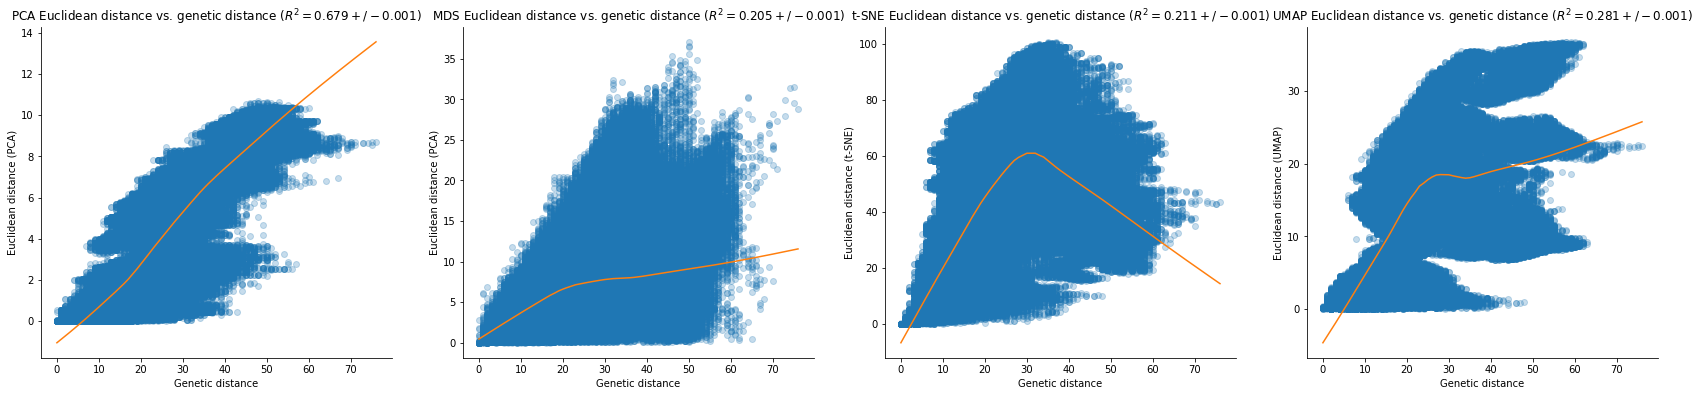

In [126]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.tight_layout(pad=8.0)
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.8)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

mean = metadata_PCA["mean"].values.tolist()[0]
std = metadata_PCA["std"].values.tolist()[0]

ax1.plot(total_df_PCA["genetic"], total_df_PCA["euclidean"], "o", alpha=0.25)
ax1.plot(total_df_PCA["LOWESS_x"], total_df_PCA["LOWESS_y"], label="LOESS")

ax1.set_xlabel("Genetic distance")
ax1.set_ylabel("Euclidean distance (PCA)")
ax1.set_title(f"PCA Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_MDS["mean"].values.tolist()[0]
std = metadata_MDS["std"].values.tolist()[0]

ax2.plot(total_df_MDS["genetic"], total_df_MDS["euclidean"], "o", alpha=0.25)
ax2.plot(total_df_MDS["LOWESS_x"], total_df_MDS["LOWESS_y"], label="LOESS")

ax2.set_xlabel("Genetic distance")
ax2.set_ylabel("Euclidean distance (PCA)")
ax2.set_title(f"MDS Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_TSNE["mean"].values.tolist()[0]
std = metadata_TSNE["std"].values.tolist()[0]

ax3.plot(total_df_TSNE["genetic"], total_df_TSNE["euclidean"], "o", alpha=0.25)
ax3.plot(total_df_TSNE["LOWESS_x"], total_df_TSNE["LOWESS_y"], label="LOESS")

ax3.set_xlabel("Genetic distance")
ax3.set_ylabel("Euclidean distance (t-SNE)")
ax3.set_title(f"t-SNE Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")



mean = metadata_UMAP["mean"].values.tolist()[0]
std = metadata_UMAP["std"].values.tolist()[0]

ax4.plot(total_df_UMAP["genetic"], total_df_UMAP["euclidean"], "o", alpha=0.25)
ax4.plot(total_df_UMAP["LOWESS_x"], total_df_UMAP["LOWESS_y"], label="LOESS")

ax4.set_xlabel("Genetic distance")
ax4.set_ylabel("Euclidean distance (UMAP)")
ax4.set_title(f"UMAP Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")


sns.despine()
plt.savefig(snakemake.output.Scatterplot, dpi=300)

## Within- and between-clade Euclidean distances for all embeddings

Use the complete embedding data frame to calculate pairwise Euclidean distances between samples and plot the results in a single figure.

In [178]:
Genetic_KDE_df_ha = pd.read_csv("results/KDEDensity_genetic_ha.csv",index_col=0)
Genetic_KDE_df_concatenated = pd.read_csv("results/KDEDensity_genetic_concatenated.csv",index_col=0)
Genetic_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_genetic_metadata_ha.csv", index_col=0)
Genetic_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_genetic_metadata_concatenated.csv", index_col=0)

In [180]:
PCA_KDE_df_ha = pd.read_csv("results/KDEDensity_pca_ha.csv",index_col=0)
PCA_KDE_df_concatenated = pd.read_csv("results/KDEDensity_pca_concatenated.csv",index_col=0)
PCA_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_pca_metadata_ha.csv", index_col=0)
PCA_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_pca_metadata_concatenated.csv", index_col=0)

MDS_KDE_df_ha = pd.read_csv("results/KDEDensity_mds_ha.csv",index_col=0)
MDS_KDE_df_concatenated = pd.read_csv("results/KDEDensity_mds_concatenated.csv",index_col=0)
MDS_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_mds_metadata_ha.csv", index_col=0)
MDS_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_mds_metadata_concatenated.csv", index_col=0)

TSNE_KDE_df_ha = pd.read_csv("results/KDEDensity_t-sne_ha.csv",index_col=0)
TSNE_KDE_df_concatenated = pd.read_csv("results/KDEDensity_t-sne_concatenated.csv",index_col=0)
TSNE_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_t-sne_metadata_ha.csv", index_col=0)
TSNE_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_t-sne_metadata_concatenated.csv", index_col=0)

UMAP_KDE_df_ha = pd.read_csv("results/KDEDensity_umap_ha.csv",index_col=0)
UMAP_KDE_df_concatenated = pd.read_csv("results/KDEDensity_umap_concatenated.csv",index_col=0)
UMAP_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_umap_metadata_ha.csv", index_col=0)
UMAP_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_umap_metadata_concatenated.csv", index_col=0)

In [181]:
import matplotlib.gridspec as gridspec

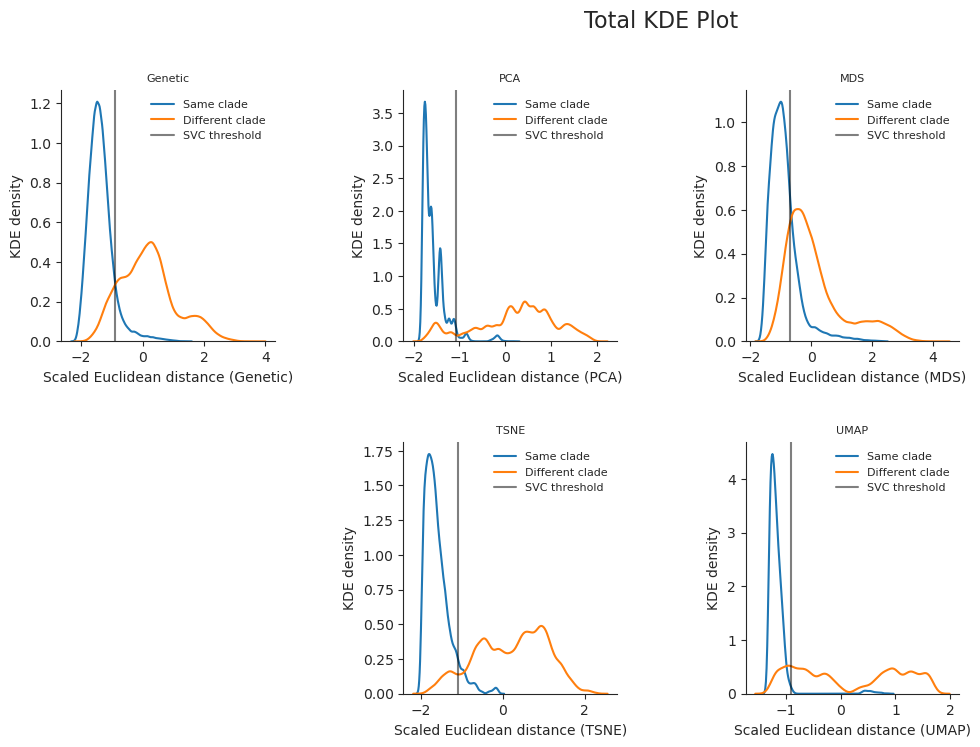

In [185]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])



#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic')
ax1.set_xlabel("Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#PCA
ax2 = sns.kdeplot(PCA_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax2)
ax2 = sns.kdeplot(PCA_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax2)
ax2.axvline(x=PCA_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title('PCA')
ax2.set_xlabel("Scaled Euclidean distance (PCA)")
ax2.set_ylabel("KDE density")

#MDS
ax3 = sns.kdeplot(MDS_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax3)
ax3 = sns.kdeplot(MDS_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax3)
ax3.axvline(x=MDS_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.legend(frameon=False)
ax3.set_title('MDS')
ax3.set_xlabel("Scaled Euclidean distance (MDS)")
ax3.set_ylabel("KDE density")

#TSNE
ax4 = sns.kdeplot(TSNE_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax4)
ax4 = sns.kdeplot(TSNE_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax4)
ax4.axvline(x=TSNE_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax4.legend(frameon=False)
ax4.set_title('TSNE')
ax4.set_xlabel("Scaled Euclidean distance (TSNE)")
ax4.set_ylabel("KDE density")

#UMAP
ax5 = sns.kdeplot(UMAP_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax5)
ax5 = sns.kdeplot(UMAP_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax5)
ax5.axvline(x=UMAP_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax5.legend(frameon=False)
ax5.set_title('UMAP')
ax5.set_xlabel("Scaled Euclidean distance (UMAP)")
ax5.set_ylabel("KDE density")


fig.suptitle('Total KDE Plot', fontsize=16)
sns.despine()
#plt.savefig(snakemake.output.KDE_density, dpi=600, bbox_inches='tight')

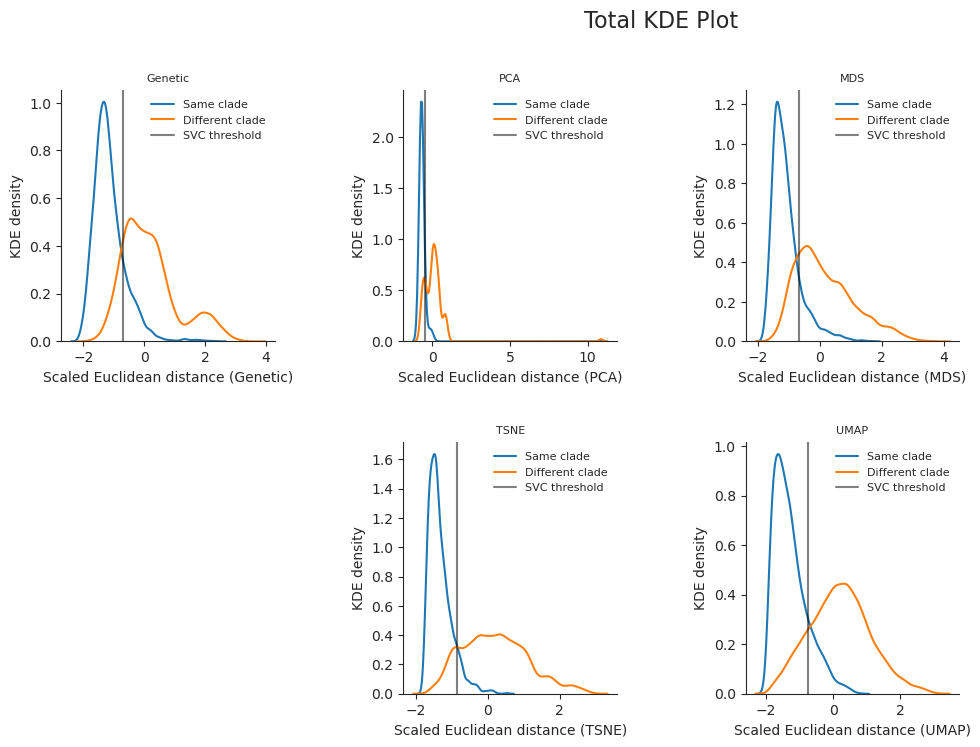

In [186]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])



#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic')
ax1.set_xlabel("Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#PCA
ax2 = sns.kdeplot(PCA_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax2)
ax2 = sns.kdeplot(PCA_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax2)
ax2.axvline(x=PCA_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title('PCA')
ax2.set_xlabel("Scaled Euclidean distance (PCA)")
ax2.set_ylabel("KDE density")

#MDS
ax3 = sns.kdeplot(MDS_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax3)
ax3 = sns.kdeplot(MDS_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax3)
ax3.axvline(x=MDS_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.legend(frameon=False)
ax3.set_title('MDS')
ax3.set_xlabel("Scaled Euclidean distance (MDS)")
ax3.set_ylabel("KDE density")

#TSNE
ax4 = sns.kdeplot(TSNE_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax4)
ax4 = sns.kdeplot(TSNE_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax4)
ax4.axvline(x=TSNE_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax4.legend(frameon=False)
ax4.set_title('TSNE')
ax4.set_xlabel("Scaled Euclidean distance (TSNE)")
ax4.set_ylabel("KDE density")

#UMAP
ax5 = sns.kdeplot(UMAP_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax5)
ax5 = sns.kdeplot(UMAP_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax5)
ax5.axvline(x=UMAP_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax5.legend(frameon=False)
ax5.set_title('UMAP')
ax5.set_xlabel("Scaled Euclidean distance (UMAP)")
ax5.set_ylabel("KDE density")


fig.suptitle('Total KDE Plot', fontsize=16)
sns.despine()
#plt.savefig(snakemake.output.KDE_density, dpi=600, bbox_inches='tight')

# Supplemental Figures

In [45]:
list_of_chart = linking_tree_with_plots_brush(merged_mds_df,['mds' + str(i) for i in range(1,11)],['MDS' + str(i) for i in range(1,11)], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[3]

chart.save(snakemake.output.MDS_Supplement)
save(chart, snakemake.output.MDS_Supplement_PNG)

In [46]:
list_of_chart = linking_tree_with_plots_brush(merged_pca_df,['pca' + str(i) for i in range(1,11)],['PCA' + str(i) for i in range(1,11)], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[3]

chart.save(snakemake.output.PCA_Supplement)
save(chart, snakemake.output.PCA_Supplement_PNG)